In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve
print(tf.__version__)

2.13.0


# data preprocessing and split

In [3]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data = data.dropna()
data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
1,0.0,1000,-30,30,283,0.988,292.1,1.019,671.9,33.27,67.2,3.69,4.31,6.55,7.48,364,4.06,245.1,469.0,1.0
2,1.0,1000,-30,30,293,0.988,297.4,1.019,671.1,33.15,66.9,3.73,4.29,6.52,7.42,365.9,3.94,250.8,477.0,1.0
3,2.0,1000,-30,30,303,0.988,302.6,1.019,670.9,33.03,66.6,3.76,4.26,6.48,7.38,367.1,3.89,253.8,485.0,1.0
4,3.0,1000,-30,35,283,0.991,292.3,1.02,673.2,33.57,67.8,3.3,4.42,6.59,7.51,365.4,4.2,246.9,454.0,1.0
5,4.0,1000,-30,35,293,0.991,297.4,1.02,672.2,33.44,67.5,3.34,4.39,6.55,7.46,367.5,4.05,253.2,461.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [4]:
len_0 = len(data.loc[data['Knocking'] == 0])
len_1 = len(data.loc[data['Knocking'] == 1])
print(len_0)
print(len_1)

1064
1081


In [5]:
X_data = data.loc[:, ['Engine Speed', 'Spark Timing', 'Throttle Angle', 'Ambient Temperature', 
                                   'Intake Pressure', 'Intake Temperature','Exhaust Pressure', 'Exhaust Temperature', 'Injected Mass']]
y_data = data['Knocking']
print(X_data)
print(y_data)

     Engine Speed Spark Timing Throttle Angle Ambient Temperature   
1            1000          -30             30                 283  \
2            1000          -30             30                 293   
3            1000          -30             30                 303   
4            1000          -30             35                 283   
5            1000          -30             35                 293   
...           ...          ...            ...                 ...   
2141         6000          -10             85                 293   
2142         6000          -10             85                 303   
2143         6000          -10             90                 283   
2144         6000          -10             90                 293   
2145         6000          -10             90                 303   

     Intake Pressure Intake Temperature Exhaust Pressure Exhaust Temperature   
1              0.988              292.1            1.019               671.9  \
2          

In [6]:
train_input, test_input, train_output, test_output = train_test_split(X_data, y_data,test_size=0.2, shuffle=True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.2, shuffle=True, random_state=42)
print(train_input.shape)
print(train_output.shape)
print(val_input.shape)
print(val_output.shape)
print(test_input.shape)
print(test_output.shape)


(1372, 9)
(1372,)
(344, 9)
(344,)
(429, 9)
(429,)


In [7]:

ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale = ss.transform(val_input)
test_scale = ss.transform(test_input)
print(train_scale)
print(val_scale)
print(test_scale)

[[-1.59375458  0.68826552 -0.53766819 ... -1.33006799 -1.83935053
  -1.80424014]
 [ 1.25465786  0.68826552 -1.33487363 ...  1.00910084  1.24935197
   0.0032684 ]
 [ 1.57114813  1.39773231  0.79100753 ...  2.08305886  1.9544773
   1.11011352]
 ...
 [ 1.57114813  1.39773231 -1.06913849 ...  1.57550336  2.04127696
   0.10481382]
 [-1.27726431 -0.73066806  0.79100753 ... -1.15352694 -1.44631387
  -1.15434943]
 [-0.96077404 -0.73066806  0.79100753 ... -1.01376528 -0.80068044
  -0.74613682]]
[[-1.27726431  1.39773231 -1.33487363 ... -1.13145931 -0.83871625
  -1.51585113]
 [-1.59375458  1.39773231  0.52527239 ... -1.32271211 -1.63454234
  -1.84892012]
 [-0.96077404 -1.44013485 -1.33487363 ... -1.03583291 -0.93136757
  -0.91470223]
 ...
 [ 0.62167732 -0.73066806  0.79100753 ...  0.63395112  0.33941846
   1.09386625]
 [-1.59375458 -1.44013485  0.25953724 ... -1.34477974 -2.09097201
  -1.80627105]
 [ 1.25465786 -0.02120127 -1.06913849 ...  1.0238126   0.85436475
   0.34649193]]
[[ 0.30518705  1.

# DNN Model 

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape = (9,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model.compile(optimizer=optimizers.legacy.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_scale, train_output, epochs=100, validation_data=(val_scale, val_output), callbacks=[callback])

Epoch 1/100
43/43 [==============================] - 1s 4ms/step - loss: 0.4863 - accuracy: 0.7675 - val_loss: 0.3583 - val_accuracy: 0.8953
Epoch 2/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8863 - val_loss: 0.2431 - val_accuracy: 0.9419
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2454 - accuracy: 0.9271 - val_loss: 0.1796 - val_accuracy: 0.9506
Epoch 4/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1965 - accuracy: 0.9402 - val_loss: 0.1410 - val_accuracy: 0.9593
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.9490 - val_loss: 0.1187 - val_accuracy: 0.9622
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9563 - val_loss: 0.1057 - val_accuracy: 0.9767
Epoch 7/100
43/43 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.9614 - val_loss: 0.0954 - val_accuracy: 0.9680
Epoch 8/100
4

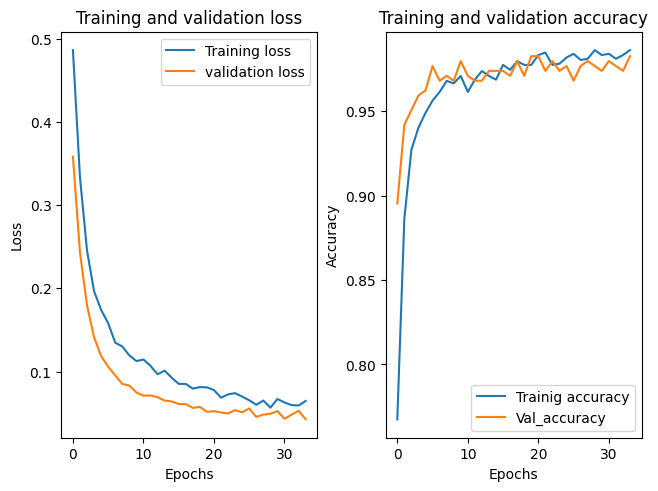

In [10]:
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']
accuracy = history_dic['accuracy']
val_accuracy = history_dic['val_accuracy']
fig, axs= plt.subplots(1, 2, constrained_layout = True)
axs[0].plot(loss, label = 'Training loss')
axs[0].plot(val_loss, label = 'validation loss')
axs[1].plot(accuracy, label = 'Trainig accuracy')
axs[1].plot(val_accuracy, label = 'Val_accuracy')
axs[0].set_title('Training and validation loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[1].set_title('Training and validation accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[0].legend()
axs[1].legend()
plt.show()



In [11]:
loss_and_accuracy = model.evaluate(test_scale, test_output)
print(loss_and_accuracy)
print('loss = ', loss_and_accuracy[0])
print('accuracy = ', loss_and_accuracy[1])

14/14 [==============================] - 0s 722us/step - loss: 0.0473 - accuracy: 0.9883
[0.047313135117292404, 0.9883449673652649]
loss =  0.047313135117292404
accuracy =  0.9883449673652649


In [12]:
predicted = model.predict(test_scale)


14/14 [==============================] - 0s 619us/step


0.9886621315192745


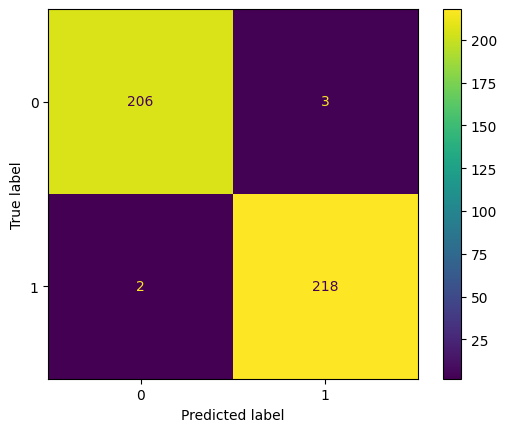

In [13]:
#Confusion matrix
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(test_output)
conf_matrix = confusion_matrix(actual, predicted)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()

#f1-score
print(f1_score(actual, predicted))

In [14]:
print(predicted)

[0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1
 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0]


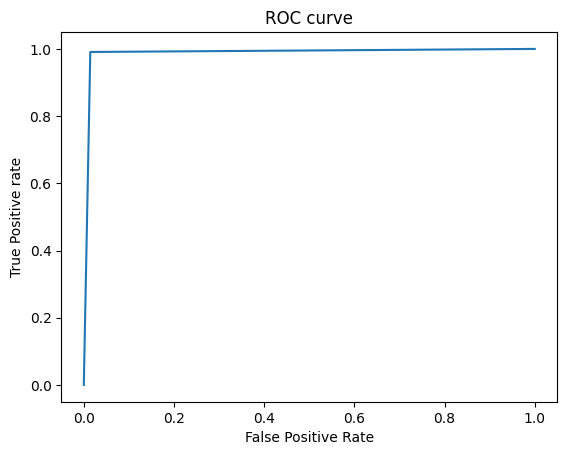

0.9882775119617225


In [15]:
#ROC CURVE
fpr, tpr, thresh = roc_curve(actual, predicted, pos_label=1)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()
    
#AUC    
auc_score1 = roc_auc_score(actual, predicted)
print(auc_score1)